In [76]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [77]:
df = pd.read_csv("data.csv")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Давайте посмотрим, какое количество пропусков мы имеем в нашем датасете

In [79]:
df.isna().sum().sum()

0

Давайте посмотрим, какой процент компаний обанкротился

In [80]:
df["Bankrupt?"].sum()

220

In [81]:
print((df["Bankrupt?"].sum()/df["Bankrupt?"].count())*100)

3.2262795131250916


Давайте построим матрицу корреляций переменных для того, чтобы понять, есть ли в переменных мультиколлинеарность. Мультиколлинеарность может привести к переобучению модели.

In [82]:
corrtable = df.corr()

In [83]:
corrtable[corrtable>0.5].count().sort_values(ascending= False)

 ROA(C) before interest and depreciation before interest    14
 ROA(B) before interest and depreciation after tax          13
 ROA(A) before interest and % after tax                     13
 Operating Profit Per Share (Yuan ¥)                        12
 Per Share Net profit before tax (Yuan ¥)                   12
                                                            ..
 Total debt/Total net worth                                  1
 Interest Expense Ratio                                      1
 Quick Ratio                                                 1
Bankrupt?                                                    1
 Net Income Flag                                             0
Length: 96, dtype: int64

Давайте разделим исходную выборку на трейн и тест

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis = 1), df["Bankrupt?"], test_size=0.3, random_state=42)

In [86]:
X_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5632,0.500951,0.584169,0.553777,0.600614,0.600549,0.999025,0.797528,0.809438,0.303650,0.781627,...,0.820175,0.002280,0.625785,0.600611,0.841847,0.278811,0.026855,0.565445,1,0.033673
903,0.479647,0.523932,0.530007,0.609666,0.609666,0.998971,0.797330,0.809240,0.303417,0.781504,...,0.789320,0.001707,0.623430,0.609661,0.839409,0.281799,0.025910,0.539820,1,0.023831
2666,0.516502,0.580953,0.568714,0.610682,0.610682,0.999128,0.797571,0.809469,0.303510,0.781720,...,0.826516,0.000909,0.624479,0.610681,0.841642,0.275619,0.026792,0.565164,1,0.113503
109,0.446302,0.531509,0.499545,0.595771,0.595771,0.998895,0.797324,0.809286,0.303565,0.781420,...,0.794111,0.015785,0.623716,0.595770,0.839915,0.277858,0.026101,0.555682,1,0.040701
5316,0.501194,0.560565,0.547781,0.600001,0.600001,0.999034,0.797440,0.809349,0.303477,0.781613,...,0.811586,0.002546,0.624576,0.600001,0.841244,0.279156,0.026794,0.565173,1,0.031863


Используем линейную классификацию для того, чтобы оценить важность коэффициентов в регрессии.

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
clf = LogisticRegression(solver='liblinear')


clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [89]:
print(clf.coef_, clf.intercept_)

[[-1.02008489e-13 -1.14028278e-13 -1.11332047e-13 -1.05632682e-13
  -1.05610536e-13 -1.69140991e-13 -1.34868029e-13 -1.36790806e-13
  -5.13828592e-14 -1.32172267e-13 -1.58819510e-10 -2.66920797e-10
  -8.00052674e-14 -4.28657835e-09 -2.74167757e-14 -3.84489764e-14
  -3.84725057e-14 -3.84622391e-14 -4.68232914e-14 -5.57788432e-14
  -1.97977200e-08 -2.28874217e-14 -3.88765977e-14 -4.30654791e-15
  -1.44021214e-13 -1.17739284e-13 -1.17736547e-13 -3.70393409e-14
  -3.53390279e-10 -1.35051874e-10 -4.50551124e-14 -6.57099225e-14
  -5.11397887e-15  4.16456995e-11 -1.06860974e-13 -1.21584827e-10
  -4.86046152e-15 -1.64695348e-13 -2.33371081e-15 -6.01631528e-14
  -8.46335995e-16 -2.27954177e-14 -3.79268490e-14 -6.64355332e-14
  -2.94250432e-14 -1.02810574e-08 -7.41450481e-09 -2.00375302e-10
   7.84064161e-12 -6.13370276e-15  3.01827216e-09 -7.09465643e-14
  -5.22292888e-09 -1.52696513e-13 -9.75838898e-14 -1.08893583e-13
  -5.06061136e-14 -7.54292947e-10  2.95291629e-10 -5.18781351e-15
  -6.16459

In [90]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [91]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [92]:
print(conf_matrix)

[[1958   10]
 [  77    1]]


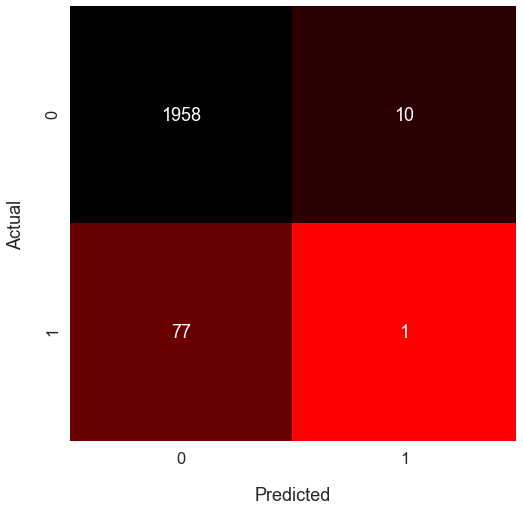

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Давайте также найдем полноту

In [94]:
recall_score(y_true=y_test,y_pred=y_pred)

0.01282051282051282

In [95]:
accuracy_score(y_true=y_test, y_pred= y_pred)

0.9574780058651027

Теперь давайте обучим модель с помощью метода опорных векторов.

In [96]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [97]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [99]:
print(conf_matrix)

[[1967    1]
 [  78    0]]


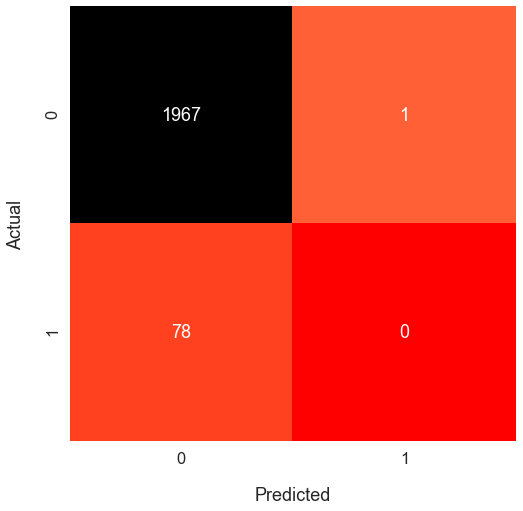

In [100]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [101]:
accuracy_score(y_true=y_test, y_pred= y_pred)

0.9613880742913001

In [102]:
recall_score(y_true=y_test,y_pred=y_pred)

0.0

Как мы можем видеть, качество модели немного выросло, однако некоторое количество аномального класса все равно предсказывается неверно.